# S2-23_AIMLCZG530 : Natural Language Processing
# Assigment 1 - Problem Statement 19
### Group 162
1. NELLORE VAMSI KIRAN REDDY - 2023AA05240
2. VAIBHAV BAJPAI - 2023AA05631
3. DIVAKAR ROY - 2023AA05721
4. ADARSH S - 2023AA05811

### Word Embeddings and text Classification 
    
 The goal of this assignment is to train a simple feed foreword neural network for text classification and get a trained word embedding vector from the network.  

 Dataset: https://drive.google.com/file/d/1L6IWcotB57S6WJGPPspfePxa3NfCGeId/view?usp=drive_link

### Part 1 : The goal in this part is to prepare the text data.  (3 Marks) 

#### 1. Read the text data and lowercasing and EDA

#### Requirements:
- "pandas"
- "seaborn"
- "scikit-learn"
- "keras"
- "numpy==1.23.5"
- "wordcloud"
- "textblob"
- "matplotlib"

In [1]:
# Import necessary libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Embedding, Dense, Flatten, Dropout, SpatialDropout1D
from keras.regularizers import l2
from keras.optimizers import Adam

In [2]:
# Load the dataset
file_path = r"TextClassification.csv"
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print(data.head())

    Genre                                           Overview
0   Drama  Two imprisoned men bond over a number of years...
1   Crime  An organized crime dynasty's aging patriarch t...
2  Action  When the menace known as the Joker wreaks havo...
3   Crime  The early life and career of Vito Corleone in ...
4   Crime  A jury holdout attempts to prevent a miscarria...


In [4]:
# Check for missing values
print(data.isnull().sum())

Genre       0
Overview    0
dtype: int64


In [5]:
# Basic statistics
print(data.describe())

        Genre                                           Overview
count    1000                                               1000
unique     14                                               1000
top     Drama  Two imprisoned men bond over a number of years...
freq      289                                                  1


In [6]:
data['Overview'] = data['Overview'].str.lower()

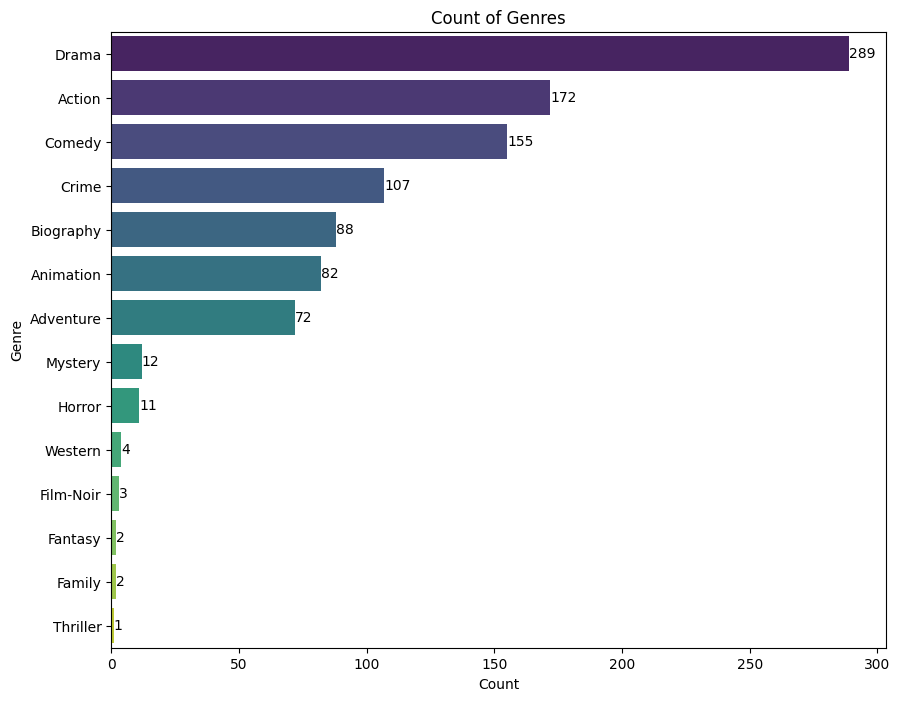

In [7]:
# Distribution of the genres
genre_count = data['Genre'].value_counts()
sorted_genre_count = genre_count.sort_values(ascending=False)
plt.figure(figsize=(10,8))
ax = sns.barplot(x=sorted_genre_count.values, y=sorted_genre_count.index, palette='viridis', hue=sorted_genre_count.index)
for index, value in enumerate(sorted_genre_count.values):
    ax.text(value, index, str(value), color='black', ha="left", va="center")
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Count of Genres')
plt.show()

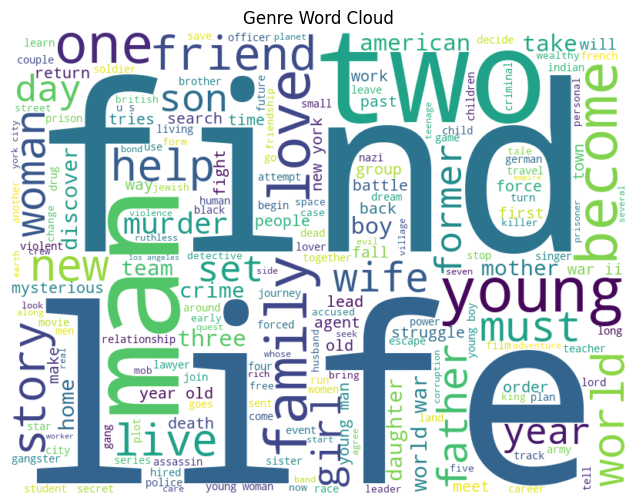

In [8]:
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(' '.join(data['Overview']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

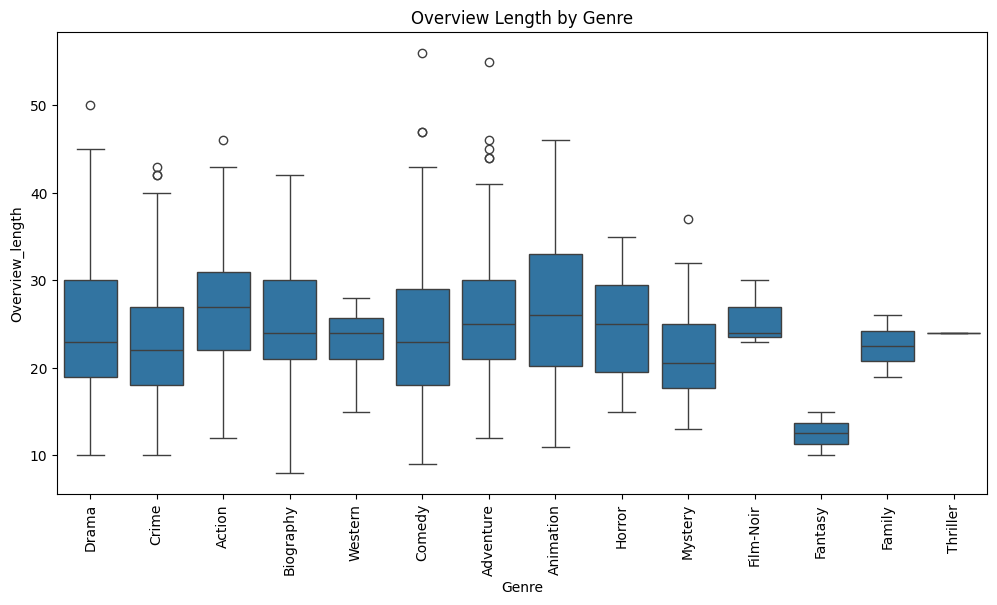

In [9]:
data['Overview_length'] = data['Overview'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Overview_length', data=data)
plt.xticks(rotation=90)
plt.title('Overview Length by Genre')
plt.show()

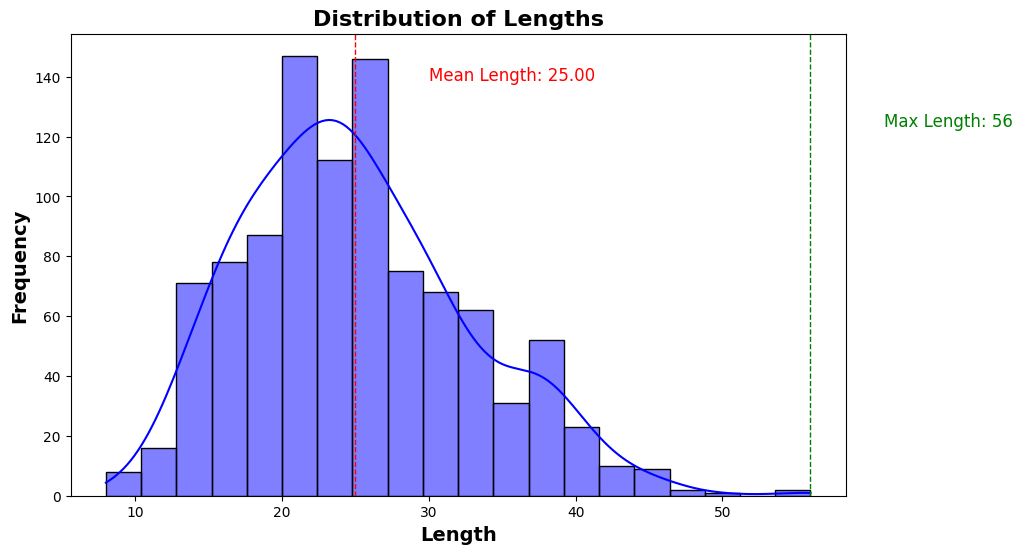

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=data, x='Overview_length', bins=20, kde=True, color='blue')
mean_length = data['Overview_length'].mean()
max_length = data['Overview_length'].max()
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_length + 5, ax.get_ylim()[1] * 0.9, f'Mean Length: {mean_length:.2f}', color='red', fontsize=12)
plt.axvline(max_length, color='green', linestyle='dashed', linewidth=1)
plt.text(max_length + 5, ax.get_ylim()[1] * 0.8, f'Max Length: {max_length}', color='green', fontsize=12)
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

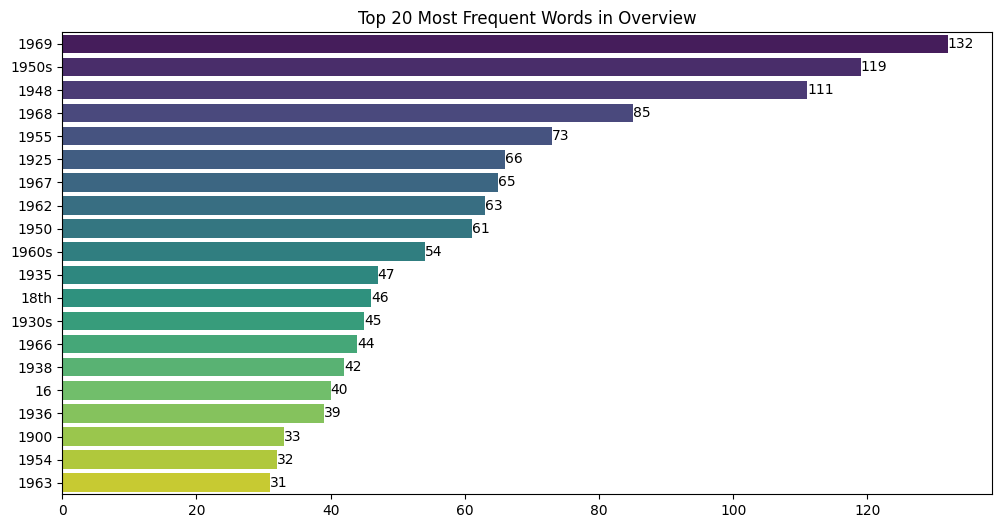

In [11]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Overview'])
word_counts = Counter(X.toarray().sum(axis=0))
words = vectorizer.get_feature_names_out()
common_words = dict(zip(words, word_counts))
sorted_common_words = dict(sorted(common_words.items(), key=lambda item: item[1], reverse=True))
top_words = dict(list(sorted_common_words.items())[:20])
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette='viridis', hue=list(top_words.keys()))
for index, value in enumerate(list(top_words.values())):
    ax.text(value, index, str(value), color='black', ha="left", va="center")
plt.title('Top 20 Most Frequent Words in Overview')
plt.show()

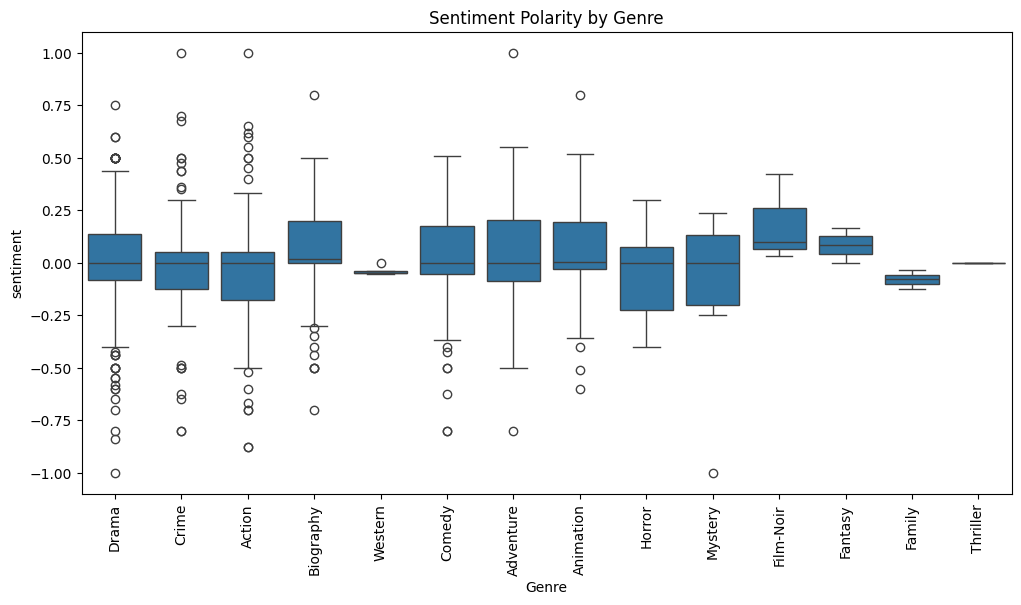

In [12]:
data['sentiment'] = data['Overview'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='sentiment', data=data)
plt.xticks(rotation=90)
plt.title('Sentiment Polarity by Genre')
plt.show()

#### 2. Tokenization, encoding and Text vectorization

In [13]:
# Prepare the text data
texts = data['Overview'].tolist()
labels = data['Genre'].tolist()

In [14]:
# Tokenize the texts
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [15]:
num_unique_words = len(tokenizer.word_index)
num_unique_words

5796

In [16]:
# Pad the sequences to ensure uniform length
max_sequence_length = max([len(seq) for seq in sequences])
X = pad_sequences(sequences, maxlen=max_sequence_length)

#### 3. Extract features and labels

In [17]:
# Encode the labels
label_dict = {label: idx for idx, label in enumerate(set(labels))}
y = np.array([label_dict[label] for label in labels])

In [18]:
print("Text data after tokenization and padding:")
print(X[:5])
print("Encoded labels:")
print(y[:5])

Text data after tokenization and padding:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   26  337
    92  226   93    1 1394    4   58  582 1395    5 2315  338   94 1396
     4 1002 2316]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    8 2317   90 2318  339 1397 2319 1003    4    7 2320  293    3
     7 1004   61]
 [   0    0    0    0    0    0    0    0    0    0    0    0   25    2
  2321  486   19    2 1398 1399 1400    5 1401   12    2   95    4  739
   740   49 2322   39    4    2 1005 1402    5  487 2323    4    7 2324
     3  137 2325]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    2  194   23    5  195    4 2326 1403    6 1006   31  110
    75    9 2327   42    7   61  741 2328    5 2329    7 2330   12    2
    41   90  742]
 [   0    0    0    0 

In [19]:
# Num of unique genres
num_classes = len(label_dict)

### Part 2 : Build a simple feedforward Neural Network with the below architecture (Hint: use keras) (3 marks)

1 Embedding layer of shape (,10)  

3 Dense layers with 100 neurons and relu activation function 

1 appropriate output dense layer with appropriate activation function

In [42]:
# Model Definition
model = Sequential()
model.add(Embedding(input_dim=num_unique_words + 1, output_dim=10, input_length=max_sequence_length))
# model.add(SpatialDropout1D(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.3))

In [43]:
# Add the output layer with softmax activation (multi-class)
model.add(Dense(num_classes, activation='softmax'))

In [44]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [46]:
# Train the model
history = model.fit(X, y, epochs=50, validation_split=0.2, batch_size=8, callbacks=[early_stopping])
# history = model.fit(X, y, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 2.2627 - accuracy: 0.2575 - val_loss: 1.9704 - val_accuracy: 0.2750
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 1.9941 - accuracy: 0.2925 - val_loss: 1.9671 - val_accuracy: 0.2750
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 1.9347 - accuracy: 0.2937 - val_loss: 1.9668 - val_accuracy: 0.2750
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 1.7956 - accuracy: 0.3562 - val_loss: 1.9781 - val_accuracy: 0.3000
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 1.3082 - accuracy: 0.5600 - val_loss: 2.1728 - val_accuracy: 0.2650
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.7820 - accuracy: 0.7713 - val_loss: 2.5778 - val_accuracy: 0.2200
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.9100 - val_loss: 3.0067 - val_accuracy: 0.2450
Epoch 

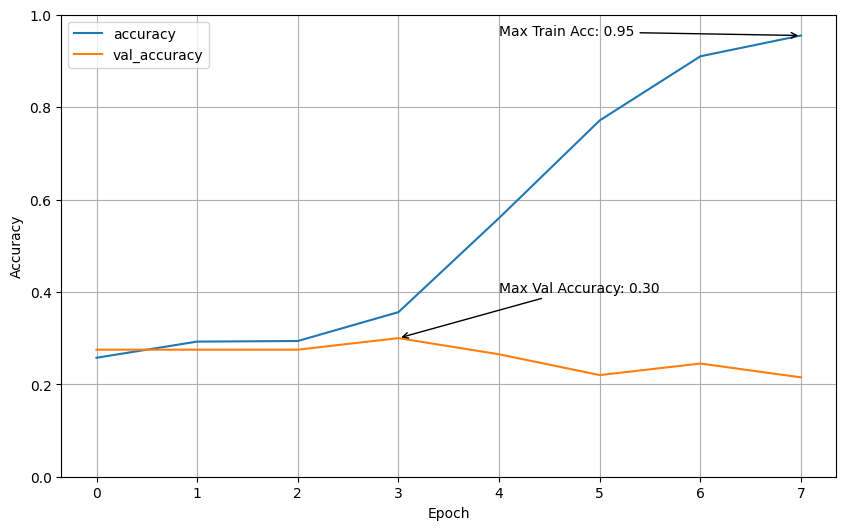

In [47]:
# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
max_train_acc = max(history.history['accuracy'])
epoch_max_train_acc = history.history['accuracy'].index(max_train_acc) + 1  # +1 because epochs are 1-indexed
plt.annotate(f'Max Train Acc: {max_train_acc:.2f}', 
             xy=(epoch_max_train_acc - 1, max_train_acc), 
             xytext=(epoch_max_train_acc - 4, max_train_acc),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)
max_val_acc = max(history.history['val_accuracy'])
epoch_max_val_acc = history.history['val_accuracy'].index(max_val_acc) + 1
plt.annotate(f'Max Val Accuracy: {max_val_acc:.2f}', 
             xy=(epoch_max_val_acc - 1, max_val_acc), 
             xytext=(epoch_max_val_acc, max_val_acc + 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)
plt.legend()
plt.show()

### Part 3

#### Extract the embedding vector from the model – 1 mark

In [48]:
# Extract the embedding vector
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.get_weights()[0]
print(f"Shape of the embedding matrix: {embedding_weights.shape}")

Shape of the embedding matrix: (5797, 10)


#### Visualize the word embeddings in a scatter plot – 1 marks (use PCA)

In [49]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedding_weights)

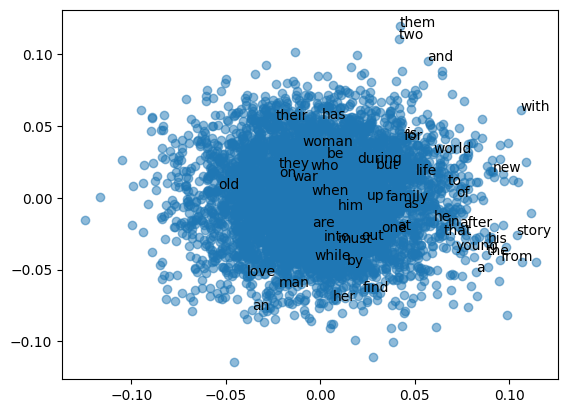

In [50]:
# Plot the embeddings
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
for i, word in enumerate(list(tokenizer.word_index.keys())[:50]):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))
plt.show()

#### Predict the class for the below given description (1 marks): 

1. “A young man who survives a disaster at sea is hurtled into an epic journey of adventure and discovery.”
2. “Mountain guides Rob Hall and Scott Fischer combine their expedition teams for a final ascent to the summit of Mount Everest. With little warning, a storm strikes the mountain and the climbers must now battle to survive”

In [51]:
# Descriptions to predict
descriptions = [
    "A young man who survives a disaster at sea is hurtled into an epic journey of adventure and discovery.",
    "Mountain guides Rob Hall and Scott Fischer combine their expedition teams for a final ascent to the summit of Mount Everest. With little warning, a storm strikes the mountain and the climbers must now battle to survive."
]

In [52]:
# Preprocess the descriptions
descriptions_sequences = tokenizer.texts_to_sequences(descriptions)
descriptions_padded = pad_sequences(descriptions_sequences, maxlen=max_sequence_length)

In [53]:
# Predict the classes
predictions = model.predict(descriptions_padded)
predicted_classes = [np.argmax(prediction) for prediction in predictions]

1/1 [==============================] - 0s 80ms/step


In [54]:
# Map predicted class indices back to labels
inv_label_dict = {v: k for k, v in label_dict.items()}
predicted_labels = [inv_label_dict[idx] for idx in predicted_classes]

In [55]:
print("Predicted labels for the descriptions:")
for description, label in zip(descriptions, predicted_labels):
    print(f"Description: {description}\nPredicted Label: {label}\n")

Predicted labels for the descriptions:
Description: A young man who survives a disaster at sea is hurtled into an epic journey of adventure and discovery.
Predicted Label: Drama

Description: Mountain guides Rob Hall and Scott Fischer combine their expedition teams for a final ascent to the summit of Mount Everest. With little warning, a storm strikes the mountain and the climbers must now battle to survive.
Predicted Label: Drama



#### Calculate Cosine Similarity of the below pair of words from the extracted word embeddings: (1 marks) 

1. Adventure, discovery  
2. Stranger, Peculiar 
3. Young, old

In [56]:
word_pairs = [
    ("adventure", "discovery"),
    ("stranger", "peculiar"),
    ("young", "old")
]

In [57]:
def get_word_vector(word):
    word_index = tokenizer.word_index.get(word)
    if word_index is not None and word_index < len(embedding_weights):
        return embedding_weights[word_index]
    else:
        return None

In [58]:
for word1, word2 in word_pairs:
    vector1 = get_word_vector(word1)
    vector2 = get_word_vector(word2)
    if vector1 is not None and vector2 is not None:
        similarity = cosine_similarity([vector1], [vector2])
        print(f"Cosine similarity between '{word1}' and '{word2}': {similarity[0][0]}")
    else:
        print(f'One of the words ("{word1}" or "{word2}") is not in the embeddings index')

Cosine similarity between 'adventure' and 'discovery': 0.7503994703292847
Cosine similarity between 'stranger' and 'peculiar': -0.10342781990766525
Cosine similarity between 'young' and 'old': -0.7621538639068604
